## Assignment 5
##Khagendra Khatri

### Part 1:
- Add 2 questions based on Lectures 5 to the exam
  - Questions must be multiple choice, with answer key
  - Use "Shuffle option order" (if it makes sense)
### Part 2:
- Complete this Jupyter notebook based on the TODO: section below, and run the notebook

### Submit both parts as a single submission on blackboard
- Copy-paste your exam questions under Create Submission
- Upload the updated jupyter notebook file


In [20]:
!pip install -U scikit-learn scipy matplotlib -q

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np


In [22]:
data = pd.read_csv('weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [23]:
xs = data[['Weight','Height']]
xs

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796
...,...,...
9995,136.777454,66.172652
9996,170.867906,67.067155
9997,128.475319,63.867992
9998,163.852461,69.034243


In [24]:
ys = data['Gender'] == 'Male'
ys

0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Gender, Length: 10000, dtype: bool

In [25]:
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.29, stratify=ys)

In [26]:
p = Perceptron()
p.fit(x_train, y_train)

print(f"Training data score: {p.score(x_train,y_train)}")
print(f"Testing data score: {p.score(x_test,y_test)}")

Training data score: 0.9132394366197183
Testing data score: 0.9186206896551724


c:\Users\Khage\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


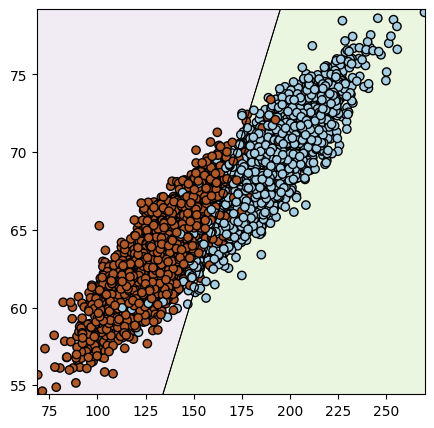

In [33]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    # make a mesh grid with a step size of 0.02
    stepSize = 0.02
    x_min, x_max = X['Weight'].min() - 10*stepSize, X['Weight'].max() + 10*stepSize
    y_min, y_max = X['Height'].min() - 10*stepSize, X['Height'].max() + 10*stepSize
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize),
                         np.arange(y_min, y_max, stepSize))
    # get model predictions for entire mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the contour based on modelpower predictions
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    # plot the actual data
    plt.scatter(X['Weight'], X['Height'], c=Y, cmap=cmap, edgecolors='k')

plot_decision_boundary(p, x_train, y_train)

### TODO:
- split data into training and test data
- create a perceptron
- train perceptron based on training data
- test perceptron with test data
- print train and test data classification results
- display learned decision bounday